# Monte Carlo Simulation with Local Volatility for European Option
From  Arbitrage-free SVI volatility surface by Gatheral, A. Jacquier. We have the following SSVI parameterisation of the total implied variance surface. 
$$ w(k,\theta_t) = \frac {\theta_t} 2 ( 1+\rho \phi ( {\theta_t} )k+ \sqrt{(\phi({\theta_t}) k+\rho)^2+1-\rho^2 })$$
Black-Scholes implied volaility could be used to calibrate a SSVI. We then derive local volatility using Dupire's formula. Natually, option could then be priced by Monte Carlo simulation with local volatility

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from SVI import SSVI, MCPricer,sigma, gamma, eta, rho

In [2]:
print("Consistency check to avoid static arbitrage: ", (gamma - 0.25*(1.+np.abs(rho))>0.))

Consistency check to avoid static arbitrage:  True


In [4]:
#spot price, drift, time to maturity
s0, r, T = 1., 0., 1.
simulationSteps, timeSteps = 10000, 100
xx = np.linspace(-0.5, 0.5, 10)
params = gamma, eta,sigma, rho

mySSVI = SSVI()
ssvivol = np.sqrt(mySSVI.SSVI(r, T, params)/T)
print("Volatility from SSVI",ssvivol)

myPricer = MCPricer()
BSPrice = myPricer.BlackScholesPrice(True,1.,s0,s0*np.exp(r),T,ssvivol)
print("BS price: ",BSPrice)
print("Implied vol from Black-Scholes: ", myPricer.BSImpVol(0., T, s0, s0*np.exp(r), BSPrice))

price,path = myPricer.Simulate(s0, s0*np.exp(r), T, params, simulationSteps, timeSteps)
print("Monte Carlo simulated price: ",price)
print("Implied vol from local volatility price by Monte Carlo: ",  myPricer.BSImpVol(0., T, s0, s0*np.exp(r), price))

Volatility from SSVI 0.3
BS price:  0.119235384740485
Implied vol from Black-Scholes:  0.29999999999999993
Monte Carlo simulated price:  0.1172711550122166
Implied vol from local volatility price by Monte Carlo:  0.29502162743289434


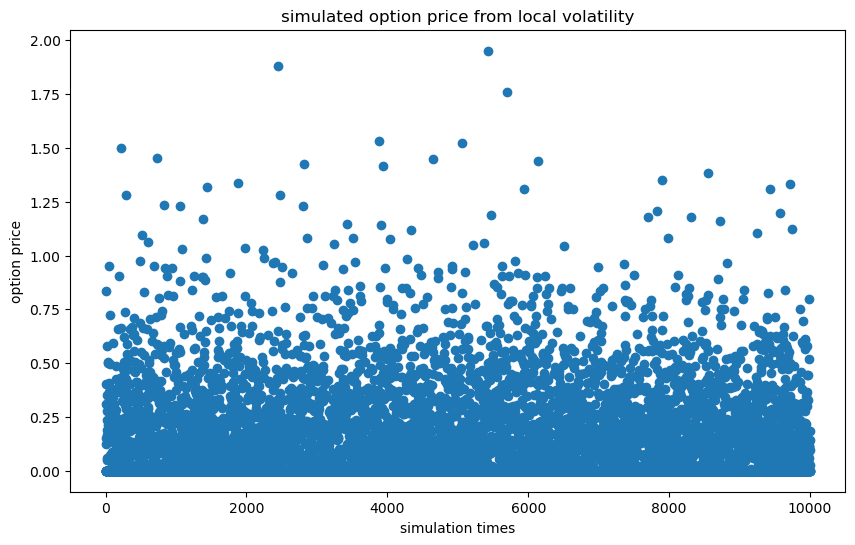

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.scatter(range(len(path)),path)
ax.set_xlabel("simulation times")
ax.set_ylabel("option price")
ax.set_title("simulated option price from local volatility");

In [16]:
mySSVI = SSVI()
params = gamma, eta, sigma, rho
r, T = np.linspace(-1., 1., 50), np.linspace(0.1, 3., 50)
# get local variance from calibrated SSVI 
localVarianceSSVI = [[mySSVI.SSVI2LocalVarg(r_, t_, params) for r_ in r] for t_ in T]

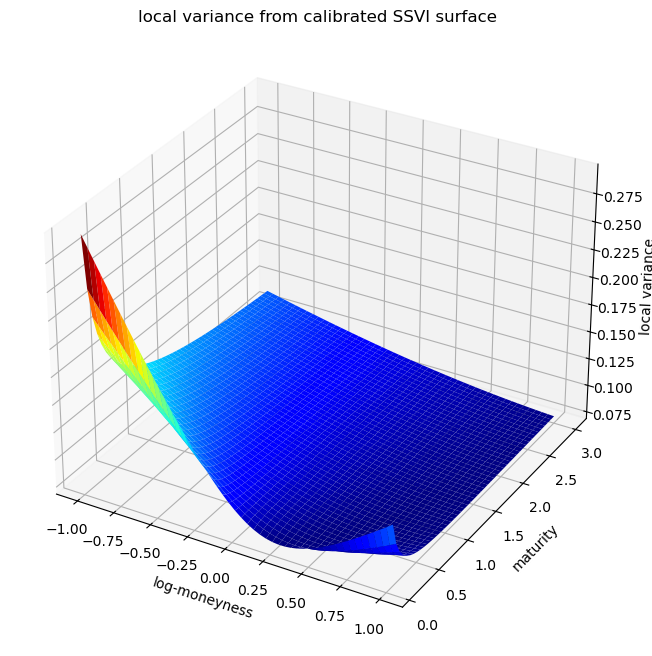

In [17]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection = '3d')
raxis, taxis = np.meshgrid(r, T)
localVarianceSSVI = np.array(localVarianceSSVI)
ax.plot_surface(raxis, taxis, localVarianceSSVI, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel("log-moneyness")
ax.set_ylabel("maturity")
ax.set_zlabel("local variance")
ax.set_title("local variance from calibrated SSVI surface")
plt.show()